In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
u = mda.Universe("15_ws.psf","100H2O_prelim.dcd") #load files

In [3]:
print(u.atoms)  #check

<AtomGroup [<Atom 1: FLU of type FLU of resname FLU, resid 1 and segid X>, <Atom 2: OH2 of type OT of resname TIP4, resid 2 and segid WT1>, <Atom 3: H1 of type HT of resname TIP4, resid 2 and segid WT1>, ..., <Atom 399: H1 of type HT of resname TIP4, resid 227 and segid WT1>, <Atom 400: H2 of type HT of resname TIP4, resid 227 and segid WT1>, <Atom 401: OM of type LP of resname TIP4, resid 227 and segid WT1>]>


In [4]:
u.atoms[0] #check

<Atom 1: FLU of type FLU of resname FLU, resid 1 and segid X>

In [5]:
u.atoms.masses[:20] #check whether masses are obtained properly

array([18.9984, 15.9994,  1.008 ,  1.008 ,  0.    , 15.9994,  1.008 ,
        1.008 ,  0.    , 15.9994,  1.008 ,  1.008 ,  0.    , 15.9994,
        1.008 ,  1.008 ,  0.    , 15.9994,  1.008 ,  1.008 ])

In [6]:
u.atoms.center_of_mass() # coordinates are in Angstrom

array([-0.25531903,  0.04690266, -0.06035197])

In [7]:
flu = u.atoms[0]  #flu represents the fluoride in each frame
print(flu.position)

[ 1.1622225  0.3553278 -2.5632226]


In [8]:
# frame_numbers = []
distance_list = [] #create lists to hold the values of the distances
# iterate through frames and get the distance between com and Ca2+ ion
for frame in u.trajectory:
    com_coord = u.atoms.center_of_mass() #cartesian coords of COM
    dist = np.linalg.norm(flu.position - com_coord)
    distance_list.append(dist)
    # counter = frame.frame # returns the frame number i.e. 0,1,2,3 etc.
    # frame_numbers.append(counter)

In [9]:
counts, lengths = np.histogram(distance_list,bins=80,range=(0,10)) #create a histogram of the distances, from 0 Angs to 10
# normalize the count by dividing by number of frames
counts = counts/len(u.trajectory)
# calculate the volume of each shell (determined by bin width)
shell_volumes = (4/3) * np.pi * (lengths[1:]**3 - lengths[:-1]**3)
# normalize the count by dividing each by shell volume (because the shell volume changes with radius)
#counts = counts/shell_volumes  # -> Is this necessary? because there is only one fluoride

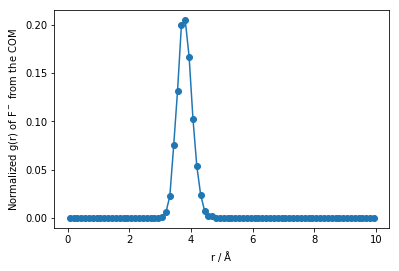

In [10]:
plt.plot((lengths[:-1]+lengths[1:])/2,counts,'-o')
plt.ylabel('Normalized g(r) of $\mathrm{F^-}$ from the COM')
plt.xlabel('r / $\mathrm{\AA}$')
plt.show()

In [11]:
counts.sum()  #normalizing with shell volume makes sum != 1

1.0

In [12]:
print(u.atoms)

<AtomGroup [<Atom 1: FLU of type FLU of resname FLU, resid 1 and segid X>, <Atom 2: OH2 of type OT of resname TIP4, resid 2 and segid WT1>, <Atom 3: H1 of type HT of resname TIP4, resid 2 and segid WT1>, ..., <Atom 399: H1 of type HT of resname TIP4, resid 227 and segid WT1>, <Atom 400: H2 of type HT of resname TIP4, resid 227 and segid WT1>, <Atom 401: OM of type LP of resname TIP4, resid 227 and segid WT1>]>


In [13]:
oxy = u.select_atoms('name OH2') # get oxygens
hyd = u.select_atoms('type HT') # get hydrogens

In [14]:
O_O = rdf.InterRDF(oxy,oxy,verbose=True)
O_O.run()

c:\program files\python37\lib\site-packages\MDAnalysis\analysis\rdf.py:302: RuntimeWarning: divide by zero encountered in double_scalars
  density = N / box_vol


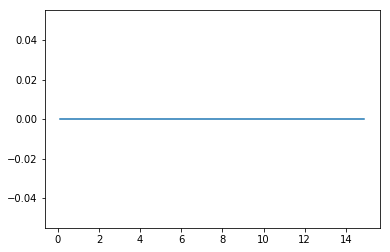

In [17]:
plt.plot(O_O.bins,O_O.rdf)